# Lab 9. Statystyka w eksploracyjnej analizie danych

Bazując na wykładzie numer 8 (https://github.com/agazbrzezny/MAD_SWPS_2025/blob/master/wyklad_8/statystyka.ipynb) wykonaj poniższe zadania.

## Zadania

**Zadanie 1**

Wykorzystaj zbiór danych [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease), a następnie:
* 1.1 Sprawdź w opisie zbioru danych (data card), które cechy są cechami numerycznymi, a które kategorialnymi. Sprawdź w jaki sposób biblioteka pandas domyślnie wczytuje te dane. Jeżeli w ramce cecha kategorialna jest oznaczona jako numeryczna to zamień ją na kategorialną (pandas posiada typ danych `category`).
* 1.2 Sprawdź czy w zbiorze występują wartości brakujące. Jeżeli tak, to przed wykonaniem kolejnych zadań przygotuj podzbiór danych, który nie będzie zawierał obserwacji z wartościami brakującymi.

**Zadanie 2**

Dla zbioru danych z zadania 1 oblicz i wyświetl:
* 2.1 Rozkład wartości w kolumnie `num` (Target) - czy dane są zbalansowane? Wyświetl je na wykresie kołowym.
* 2.2 Podstawową statystykę opisową dla każdej cechy numerycznej (min, max, średnia, mediana, odchylenie standardowe, wartość kwantyli 25, 50 oraz 75).
* 2.3 Dominantę (modę) dla każdej cechy kategorialnej.
* 2.4 Wyświetl macierz korelacji Pearsona dla każdej cechy numerycznej zbioru. Wyświetl ją również na wykresie typu mapa cieplna z wykorzystaniem biblioteki seaborn.
* 2.5 Z macierzy korelacji wyświetl nazwy trzech najbardziej skorelowanych cech względem cechy `age` (bezwzględna wartość z korelacji, bez uwzględniania samej cechy `age` w wynikach, która jak wiemy będzie skorelowana sama do siebie w stopniu równym 1).

**Zadanie 3**

Do wykonania poniższych poleceń wykorzystaj zbiór [Adult](https://archive.ics.uci.edu/dataset/2/adult). W tym zbiorze również ustaw typy kategorialne dla odpowiednich kolumn zgodnie z opisem zbioru danych.

* 3.1 Na podstawie zbioru bazowego przygotuj dwa podzbiory danych:

  * zbior_1 - losowe 20% wartości ze zbioru oryginalnego (próbkowanie bez uwzględnienia rozkładu dla cechy opisowej - target)
  * zbior_2 - pozostałe 80% wartości bez elementów ze zbioru_1
  * zbior_3 - losowe 20% wartości ze zbioru oryginalnego (próbkowanie z uwzględnieniem rozkładu cechy opisowej)


Następnie porównaj średnią wartość cechy `capital-loss` dla każdej z prób. Jakie jest prawdopodobieństwo, że te próby pochodzą z tej samej populacji?

* 3.2 Wykonaj test t dla prób zależnych dla wartości cechy `capital-gain` przyjmując następującą hipotezę zerową: średnia wartość tej cechy dla `race`='White' jest istotnie wyższa niż dla pozostałych wartości cechy `race`. Przyjmij lub odrzuć przyjętą hipotezę.

* 3.3 Wykorzystując test ANOVA sprawdź jak istotna statystycznie jest różnica średniej wartości cechy `capital-gain` dla każdej z wartości `race` z osobna. Wskaż `p-values` dla tego testu. Jak zinterpretować ten wynik?

**Zadanie 4**

Wykonaj test Chi square dla wartości cechy `capital-income` dla dwóch grup:
* ludzie w wieku < 40 lat
* ludzie w wieku >= 40 lat

Wyświetl wyniki tego testu.

In [2]:
!pip install ucimlrepo


In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets
df = pd.concat([X, y], axis=1)
print(heart_disease.metadata)
print(heart_disease.variables)
df.head()


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [13]:
# 1.1
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
for col in cat_cols:
    df[col] = df[col].astype('category')

# 1.2
df_clean = df.dropna()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       297 non-null    int64   
 1   sex       297 non-null    category
 2   cp        297 non-null    category
 3   trestbps  297 non-null    int64   
 4   chol      297 non-null    int64   
 5   fbs       297 non-null    category
 6   restecg   297 non-null    category
 7   thalach   297 non-null    int64   
 8   exang     297 non-null    category
 9   oldpeak   297 non-null    float64 
 10  slope     297 non-null    category
 11  ca        297 non-null    category
 12  thal      297 non-null    category
 13  num       297 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 17.9 KB


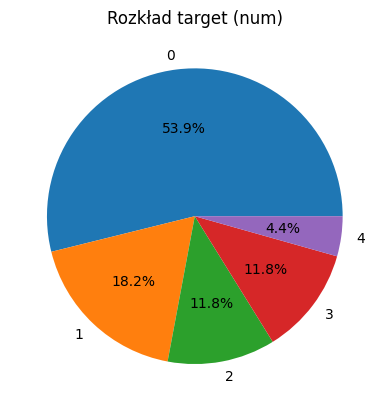

sex: 1
cp: 4
fbs: 0
restecg: 0
exang: 0
slope: 1
ca: 0.0
thal: 3.0
num: 0


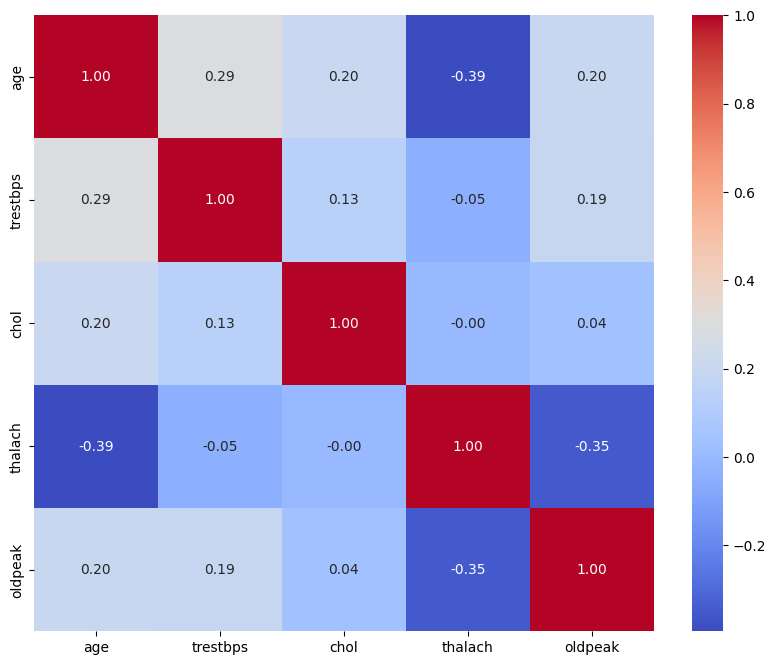

thalach     0.394563
trestbps    0.290476
chol        0.202644
Name: age, dtype: float64


In [14]:
# 2.1
import matplotlib.pyplot as plt
df_clean['num'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='', title='Rozkład target (num)')
plt.show()

# 2.2
num_cols = df_clean.select_dtypes(include='number').columns
df_clean[num_cols].describe(percentiles=[.25, .5, .75]).T

# 2.3
cat_cols = df_clean.select_dtypes(include='category').columns
for col in cat_cols:
    print(f"{col}: {df_clean[col].mode()[0]}")

# 2.4
import seaborn as sns
corr = df_clean[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# 2.5
age_corr = corr['age'].drop('age').abs().sort_values(ascending=False)
print(age_corr.head(3))


In [8]:
# 3 – Wczytanie danych Adult + analiza
import pandas as pd
from ucimlrepo import fetch_ucirepo
from scipy import stats
import numpy as np


adult = fetch_ucirepo(id=2)
df_adult = pd.concat([adult.data.features, adult.data.targets], axis=1)


cat_cols = ['workclass', 'education', 'marital-status', 'occupation',
            'relationship', 'race', 'sex', 'native-country', 'income']
for col in cat_cols:
    df_adult[col] = df_adult[col].astype('category')

# 3.1
zbior_1 = df_adult.sample(frac=0.2, random_state=42)
zbior_2 = df_adult.drop(zbior_1.index)
zbior_3 = df_adult.groupby('income', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))

mean_1 = zbior_1['capital-loss'].mean()
mean_2 = zbior_2['capital-loss'].mean()
mean_3 = zbior_3['capital-loss'].mean()

print(f"{mean_1:.2f}")
print(f"{mean_2:.2f}")
print(f"{mean_3:.2f}")


t_stat, p_val = stats.ttest_ind(zbior_1['capital-loss'], zbior_3['capital-loss'], equal_var=False)
print(f"Test t: t = {t_stat:.3f}, p = {p_val:.5f}")

# 3.2
white = df_adult[df_adult['race'] == ' White']['capital-gain']
non_white = df_adult[df_adult['race'] != ' White']['capital-gain']
t_stat2, p_val2 = stats.ttest_ind(white, non_white, equal_var=False)
p_one_sided = p_val2 / 2 if t_stat2 > 0 else 1 - p_val2 / 2
print(f"{t_stat2:.3f},  {p_one_sided:.5f}")

# 3.3
groups = [group['capital-gain'] for _, group in df_adult.groupby('race')]
f_stat, p_anova = stats.f_oneway(*groups)
print(f" {f_stat:.3f}, {p_anova:.5f}")


Średnia capital-loss (zbior_1): 88.41
Średnia capital-loss (zbior_2): 87.27
Średnia capital-loss (zbior_3): 88.01
Test t: t = 0.071, p = 0.94366
Test t jednostronny (White > reszta): t = nan, p = nan
ANOVA: F = 7.544, p = 0.00000


<ipython-input-8-fccfa883ff7a>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zbior_3 = df_adult.groupby('income', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))
<ipython-input-8-fccfa883ff7a>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  zbior_3 = df_adult.groupby('income', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; a

In [15]:
# 4
from scipy.stats import chi2_contingency


df_adult['age_group'] = pd.cut(df_adult['age'], bins=[0, 39, 100], labels=['<40', '>=40'])


table = pd.crosstab(df_adult['age_group'], df_adult['income'])

chi2, p_chi, dof, expected = chi2_contingency(table)

print(table)
print(f"{chi2:.3f}, {p_chi:.5f}")


income     <=50K  <=50K.  >50K  >50K.
age_group                            
<40        15504    7733  2820   1387
>=40        9216    4702  5021   2459
2545.489, 0.00000
